### Medium - Visualização de Dados

**OBS:** Estarei utilizando ponto e vírgula (;) na última linha de cada plotagem para remover os textos inline indesejados do matplotlib.

In [34]:
# Configuração Inicial
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

dados_globais = pd.read_csv("world-data-2023.csv")

sns.set_theme()

In [35]:
dados_globais.head()  # Primeira visualização do dataset.

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


Escolhendo a coluna de ***Currency-Code***, que representa a moeda usada por cada país, vamos procurar quais são as mais usadas.

### Gráficos de Barras - Dataset Global

In [36]:
paises_por_moeda = dados_globais["Currency-Code"].value_counts()
maiores_moedas = paises_por_moeda.head()

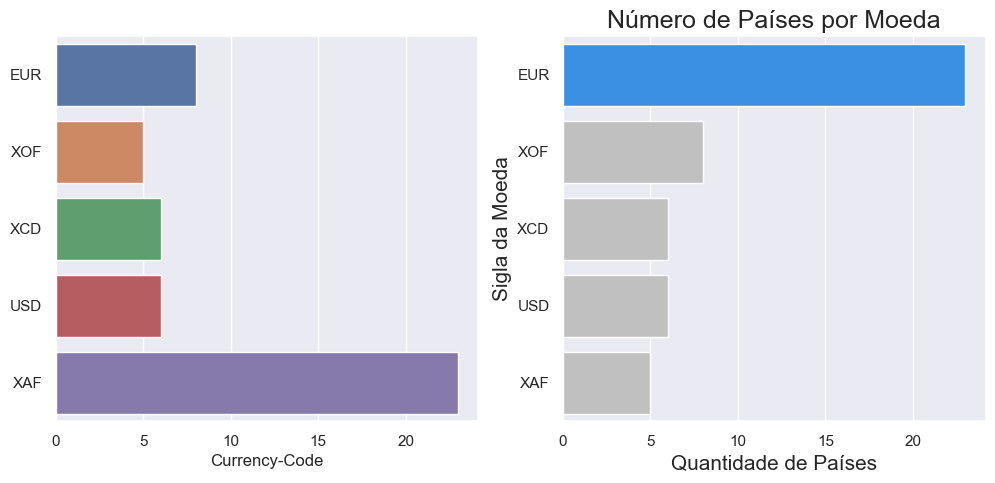

In [37]:
#  Para fim de leitura do notebook, será criado um subplot para visualização de ambos gráficos.
plt.figure(figsize=(12,5))
plt.subplot(121)

#  1.º Gráfico:
#  Vamos usar .sample() para fins didáticos com o fim de mostrar um gráfico sem ordem.
sns.barplot(x=maiores_moedas.sample(frac=1), y=maiores_moedas.index) 

#  2.º Gráfico:
plt.subplot(122)
paleta = ["silver" if i < max(maiores_moedas) else "dodgerblue" for i in maiores_moedas]
sns.barplot(x=maiores_moedas, y=maiores_moedas.index, palette=paleta)
plt.title("Número de Países por Moeda", fontsize=18)
plt.xlabel("Quantidade de Países",fontsize=15)
plt.ylabel("Sigla da Moeda",fontsize=15);

### Boxplots confusos

Abaixo, a criação das distribuições de probabilidade, usando ***numpy.random***, ***for loop*** para criar a assimetria e então a plotagem.

In [38]:
np.random.seed(0)  # Para repetibilidade

#  Geração de uma lista com elementos normalizados.
aleatorios_normais = np.random.standard_normal(size=1000)

# Aplicando limite superior e inferior
dados_normais = [i for i in aleatorios_normais if 2.5 > i > -2.5]

# Criando um vão entre 0,1 e 0,5.
dados_assimetricos = []
for valor in dados_normais:
    if 0.5 > valor > 0.1:
        dados_assimetricos.append(0.65)
    #  Ajustando medidas de tendência central
    elif -0.6 < valor < -0.5:
        dados_assimetricos.append(-0.65)
    else:
        dados_assimetricos.append(valor)

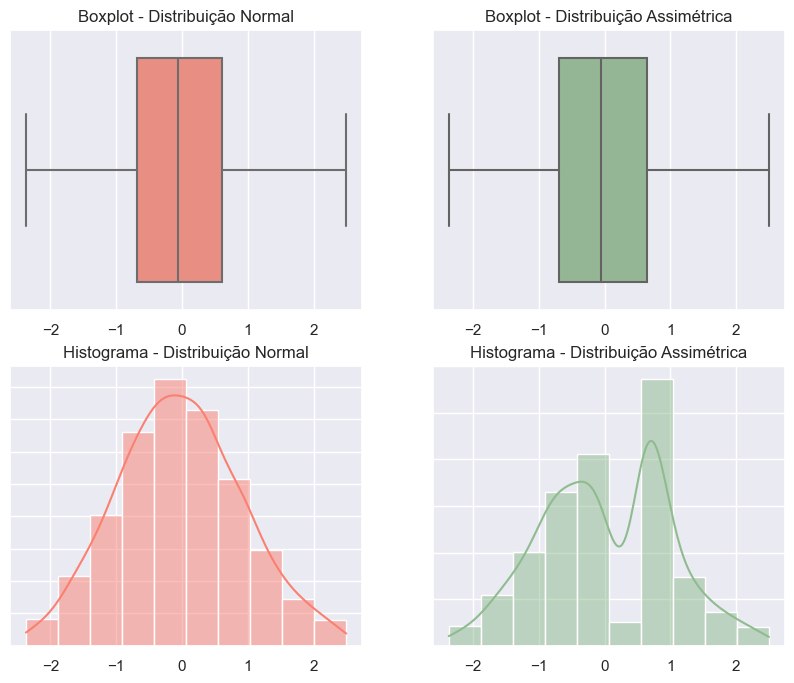

In [39]:
#  Criação de espaço gráfico
plt.figure(figsize=(10,8))

#  Plotagem da distribuição normal
plt.subplot(221)
sns.boxplot(
    dados_normais, orient="h", color="salmon").set(
    title="Boxplot - Distribuição Normal", yticklabels=[])

plt.subplot(223)
sns.histplot(
    dados_normais, color="salmon", bins=10, kde=True).set(
    title="Histograma - Distribuição Normal", 
    yticklabels=[], ylabel="")


#  Plotagem da distribuição assimétrica
plt.subplot(222)
sns.boxplot(
    dados_assimetricos, orient="h", color="darkseagreen").set(
    title="Boxplot - Distribuição Assimétrica", yticklabels=[])

plt.subplot(224)
sns.histplot(
    dados_assimetricos, color="darkseagreen", bins=10, kde=True).set(
    title="Histograma - Distribuição Assimétrica",
    yticklabels=[], ylabel="");

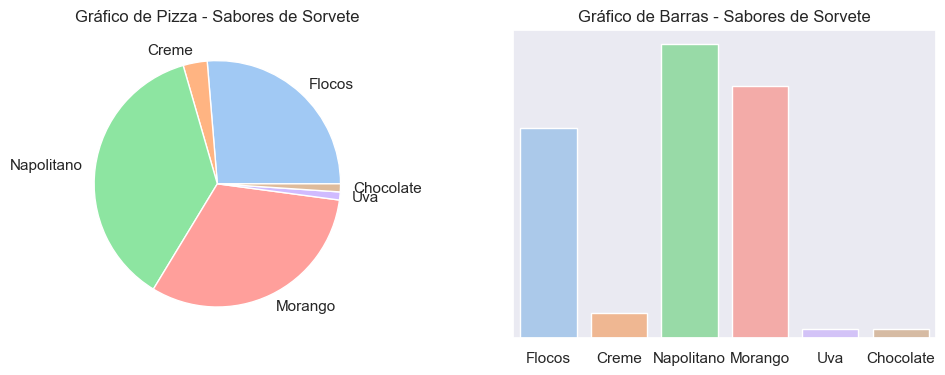

In [40]:
#  Criação de dados fictícios e separação em listas para plotagem.
vendas = {
    "Flocos": 25, "Creme": 3, "Napolitano": 35,  
    "Morango": 30, "Uva":1, "Chocolate": 1
}

paleta_cores = sns.color_palette("pastel")
nome_vendas = list(vendas.keys())
quantidade_vendas = list(vendas.values())

#  Criação de espaço gráfico
plt.figure(figsize=(12,4))

#  Gráfico de Pizza
plt.subplot(121)
plt.pie(quantidade_vendas, labels=nome_vendas,colors=paleta_cores)
plt.title("Gráfico de Pizza - Sabores de Sorvete")

#  Gráfico de Barras
plt.subplot(122)
plt.grid(False)  # Retirar a visualização em grades.
fig,ax = sns.barplot(
    x=nome_vendas, y=quantidade_vendas,palette=paleta_cores).set(
    title="Gráfico de Barras - Sabores de Sorvete", yticklabels=[])